In [1]:
from keras.layers.core import Dense, Dropout, SpatialDropout1D
from keras.layers.convolutional import Conv1D
from keras.layers.embeddings import Embedding
from keras.layers.pooling import GlobalMaxPooling1D
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
import collections
import nltk
nltk.download('all')
import numpy as np
import matplotlib.pyplot as plt

C:\Users\anees\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\anees\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\anees\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     C:\Users\anees\AppData\Roaming\nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\anees\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     C:\Users\anees\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     C:\Users\a

[nltk_data]    |   Package sentence_polarity is already up-to-date!
[nltk_data]    | Downloading package shakespeare to
[nltk_data]    |     C:\Users\anees\AppData\Roaming\nltk_data...
[nltk_data]    |   Package shakespeare is already up-to-date!
[nltk_data]    | Downloading package sinica_treebank to
[nltk_data]    |     C:\Users\anees\AppData\Roaming\nltk_data...
[nltk_data]    |   Package sinica_treebank is already up-to-date!
[nltk_data]    | Downloading package smultron to
[nltk_data]    |     C:\Users\anees\AppData\Roaming\nltk_data...
[nltk_data]    |   Package smultron is already up-to-date!
[nltk_data]    | Downloading package state_union to
[nltk_data]    |     C:\Users\anees\AppData\Roaming\nltk_data...
[nltk_data]    |   Package state_union is already up-to-date!
[nltk_data]    | Downloading package stopwords to
[nltk_data]    |     C:\Users\anees\AppData\Roaming\nltk_data...
[nltk_data]    |   Package stopwords is already up-to-date!
[nltk_data]    | Downloading package su

In [2]:
np.random.seed(42)

In [3]:
INPUT_FILE = (r"C:\Users\anees\OneDrive\Documents\sentiment_classification/training.txt")
VOCAB_SIZE = 5000
EMBED_SIZE = 100
NUM_FILTERS = 256
NUM_WORDS = 3
BATCH_SIZE = 64
NUM_EPOCHS = 20

In [4]:
counter = collections.Counter()
file = open(INPUT_FILE,"r",encoding="utf8")
maxlen = 0
for line in file:
    _,sent = line.strip().split("\t")
    #print(sent)
    words = [x.lower() for x in nltk.word_tokenize(sent)]
    if len(words)> maxlen:
        maxlen = len(words)
    for word in words:
        counter[word] += 1
file.close()

In [5]:
word2index = collections.defaultdict(int)
for wid, word in enumerate(counter.most_common(VOCAB_SIZE)):
    word2index[word[0]] = wid + 1
vocab_size = len(word2index) + 1
id2wordindex = {v:k for k,v in word2index.items()}

In [14]:
xs, ys = [], []
file = open(INPUT_FILE,"r", encoding='utf8')
for line in file:
    label,sent = line.strip().split("\t")
    try:
        ys.append(int(label))
        words = [x.lower() for x in nltk.word_tokenize(sent)]
        wids = [word2index[word] for word in words]
        xs.append(wids)
    except:
        print("error")

file.close()

X = pad_sequences(xs,maxlen = maxlen)
Y = np_utils.to_categorical(ys)


error


In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

model = Sequential()
model.add(Embedding(vocab_size,EMBED_SIZE,input_length = maxlen))
#model.add(SpatialDropout1D(Dropout(0.2)))
model.add(Conv1D(filters=NUM_FILTERS,kernel_size=NUM_WORDS,activation="relu"))
model.add(GlobalMaxPooling1D())
model.add(Dense(2,activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer= "adam",metrics=["accuracy"])

from keras.callbacks import ModelCheckpoint
filepath = "weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor="val_acc", verbose=1, save_best_only= True, mode="max")
callbacks_list = [checkpoint]
history = model.fit(X_train,y_train,batch_size=BATCH_SIZE, epochs=NUM_EPOCHS,validation_data=(X_test,y_test),callbacks = callbacks_list)


Train on 5196 samples, validate on 1300 samples
Epoch 1/20
5196/5196 [==============================] - 106s 20ms/step - loss: 0.2645 - acc: 0.8882 - val_loss: 0.0368 - val_acc: 0.9862
Epoch 2/20
5196/5196 [==============================] - 101s 19ms/step - loss: 0.0168 - acc: 0.9942 - val_loss: 0.0225 - val_acc: 0.9908
Epoch 3/20
5196/5196 [==============================] - 104s 20ms/step - loss: 0.0046 - acc: 0.9987 - val_loss: 0.0221 - val_acc: 0.9915
Epoch 4/20
5196/5196 [==============================] - 100s 19ms/step - loss: 0.0023 - acc: 0.9996 - val_loss: 0.0224 - val_acc: 0.9923
Epoch 5/20
5196/5196 [==============================] - 101s 19ms/step - loss: 0.0017 - acc: 0.9996 - val_loss: 0.0217 - val_acc: 0.9923
Epoch 6/20
5196/5196 [==============================] - 104s 20ms/step - loss: 0.0011 - acc: 0.9998 - val_loss: 0.0201 - val_acc: 0.9938
Epoch 7/20
5196/5196 [==============================] - 100s 19ms/step - loss: 0.0015 - acc: 0.9996 - val_loss: 0.0203 - val_acc: 

In [19]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


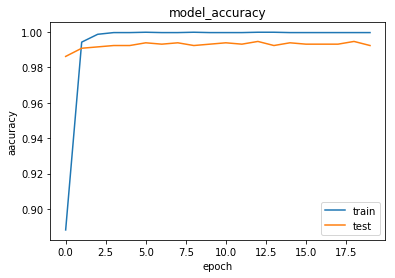

In [20]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model_accuracy')
plt.xlabel('epoch')
plt.ylabel('aacuracy')
plt.legend(['train','test'])
plt.show()

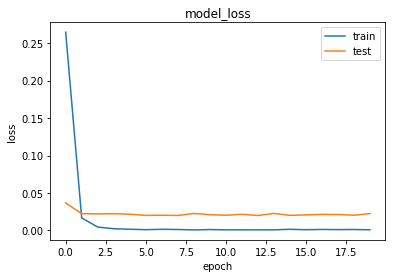

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'])
plt.show()